# Dependencies

In [1]:
import numpy as np
np.set_printoptions(5)

def result(resultat): 
    
    print("="*80)
    print(resultat)
    print("="*80)


# Week 10 - Neural Networks

Learning contents:
1. Detailed example: Two-layer MLP for regression
    - Forward pass: Calculate the values of $z_1$, $z_2$, and $y$
    - Compute the mean squared error
    - Using backpropagation, compute the gradient or the error w.r.t the weights $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
    - Compute the updated weights for $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
2. PyTorch: 2-layer MLP for classification
    - Create and train a 2-layer MLP

# 1) Detailed example: Two-layer MLP for regression
We'll be working through a forward and back-propagation example in all its details for a 2-layer MLP for regression. Our network has the following structure:

![](two-layer-nn.svg)

Where 
    $$
    z_j = \text{ReLU}\left(a_j \right)
    \qquad
    a_j = \sum_i w^{(1)}_{ij} x_i
    \qquad
    y_j = \sum_i w^{(2)}_{ij} z_i
    $$
and the biases 
    $$
    x_0 = z_0 = 1
    $$

Suppose, we have the weights
    $$
    \mathbf{W}^{(1)} = \left[ 
        \begin{matrix}
        0.1 & 0.2\\
        -1.1 & 1.2\\
        -2.1 & 2.2
        \end{matrix}
    \right]
    \qquad
    \mathbf{w}^{(2)} = \left[ 
        \begin{matrix}
        -0.1\\
        1.1 \\
        2.2
        \end{matrix}
    \right]
    $$
Notice that the bias weights are included in the weight matrix. Relating it to the drawing, we have $w_{0,1} = 0.1$, $w_{1,2} = 1.2$

Moreover, we are given an input
    $$
    \mathbf{x} = \left[ 
        \begin{matrix}
        0.1 \\
        0.2
        \end{matrix}
    \right]
    $$
    
Relating these to the drawing, we have $w^{(1)}_{1,2} = 1.2$ and $x_1 = 0.1$

## 1.1) Forward pass: Calculate the values of $z_1$, $z_2$, and $y$

Use the values and formulas given above, as well as information about the ReLU activation function given in lecture 19 sldie 9 to determine the values. 

In [2]:
# The activating
a = lambda W, x : x.reshape(1, -1) @ W

# Activator
z = lambda activator, a : activator(a)
relu         = lambda a : np.array([aj if aj > 0 else 0 for aj in a]) 
reluDiff     = lambda a : np.array([ 1 if aj > 0 else 0 for aj in a]) if type(a) == np.ndarray           else 1 if a > 0 else 0 
identity     = lambda a : a
identityDiff = lambda a : np.ones(a.shape)                            if type(a) == np.ndarray           else 1 


x = np.array([[1],
              [0.1],
              [0.2]]) # Including bias term
W1 = np.array([[ 0.1, 0.2], 
              [-1.1, 1.2], 
              [-2.1, 2.2]])
w2 = np.array([[-0.1], 
               [ 1.1], 
               [ 2.2]])
# Layer 1 
a1s = a(W1, x)[0]
z1s = z(relu, a1s)
print(a1s)

# Layer 2
z1s = np.insert(z1s, 0, 1)
a2s = a(w2, z1s)
y = z(identity, a2s)[0][0]

resultat = f"z1 = {z1s[1]},\nz2 = {z1s[2]},\ny = {y}"
result(resultat)

[-0.43  0.76]
z1 = 0.0,
z2 = 0.7600000000000001,
y = 1.5720000000000003


## 1.2) Compute the mean squared error
Suppose our target $t=2$.
Use the formula for MSE shown in lecture 19, slide 17 (8)

In [3]:
error = lambda y, t : 1/2 * (np.sum([y - t]))**2

t = 2
Ew = error(y, t)
resultat = f"E(w) = {Ew}"
result(resultat)


E(w) = 0.09159199999999988


## 1.3) Using backpropagation, compute the gradient or the error w.r.t the weights $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
This corresponds to the bottom row of weights on the figure <br>
To compute this, look at formulas 5.65 - 5.67 in the course book(Bishop).

![Skærmbillede 2024-11-07 kl. 14.31.57.png](<attachment:Skærmbillede 2024-11-07 kl. 14.31.57.png>)
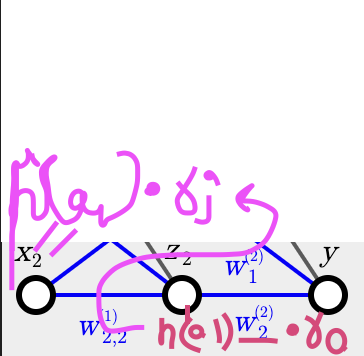

In [4]:
errorSignal = lambda diff_activator, aj, weights, error : diff_activator(aj) * np.inner(weights, error)  # Inner is simple 1x1 multiplication for scalars.


## Steps
# Calculate del(En)
# Update values

# Calculate gradient of the errorfunction En with respect to the weights on its path

def weightUpdate(W, eta, gradient): 
    W = W - eta * gradient

# Theory. 
# The derivative of the error function w.r.t the weights wji indicating between layer i and j, is given by. 
# gammaj * zi 
# So the gradient of the error functions is found for "an" input, from "an" error signal. When looking at single paths. 

# Lets find the bottom and build up from there.
#                           Layer 0                         Layer 1                             Output                                                             
error =                                                                                         y - t
gamma1s =                               errorSignal(reluDiff, a1s[1], w2[2], error)

gammas = np.array([[  error],
                   [gamma1s[0]]])


zs = np.array([[z1s[2]], 
               [  x[2][0]]])
gradient = gammas * zs 

resultat = f"gradients = \n{gradient}, \n from High -> Low"
result(resultat)


gradients = 
[[-0.32528]
 [-0.18832]], 
 from High -> Low


## 1.4) Compute the updated weights for $w^{(2)}_2$ and $w^{(1)}_{2,2}$ 
Use a learning rate $\eta = 0.1$ 

You will want to use formula 5.43 in the course book to determine the updated weights



In [5]:
learningRate = 0.1
def weightUpdate(W, eta, gradient): 
    W -= eta * gradient
    
weightUpdate(W1[2, 1:], learningRate, gradient[1]) # Layer 0 <-> 1
weightUpdate(w2[2], learningRate, gradient[0])    # Layer 1 <-> 2

resultat = f"Updated Weights: \nW1 = \n{W1},\nw2 = \n{w2}"
result(resultat)

Updated Weights: 
W1 = 
[[ 0.1      0.2    ]
 [-1.1      1.2    ]
 [-2.1      2.21883]],
w2 = 
[[-0.1    ]
 [ 1.1    ]
 [ 2.23253]]


# 2) PyTorch: 2-layer MLP for classification
Luckily, there are some nice Deep Learning libraries out there, that make working with neural networks a pleasure.
The two most noteable are [Tensorflow](https://www.tensorflow.org) and [PyTorch](https://pytorch.org). We'll be using the latter.

In order to install it in your conda environment you can use
```pip install torch torchvision```

A key feature of these libraries is that they can handle the gradient computation for you.
Moreover, they have a lot of layer types and losses, that are easily composable to handle computation of complex neural networks.

We'll be working with the classic MNIST dataset, which we can easily get via PyTorch

In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('../data', train=False, download=True, transform=transform)

train_loader = DataLoader(
    train_data,
    batch_size = 64,
    shuffle=True,
)

test_loader = DataLoader(
    test_data,
    batch_size = 64,
)

A few steps happened here:
1. The dataset (train and test) was downloaded 
1. We created a `DataLoader` for each data split. Using this, we get batches of data (64 examples per batch here)
1. We told asked for the training data to be shuffled

Lets see what we get in a batch:

In [7]:
data, targets = next(iter(train_loader))
data.shape, targets.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

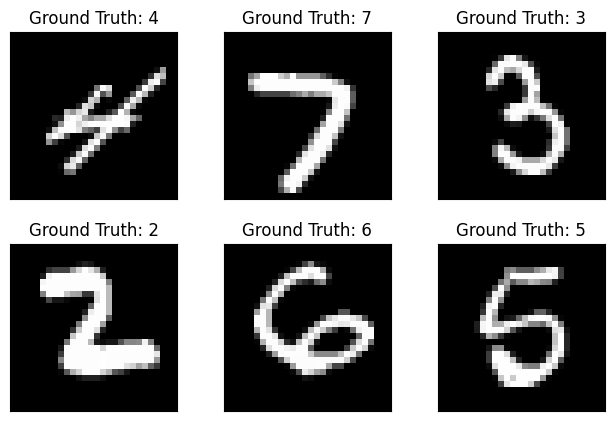

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(targets[i]))
    plt.xticks([])
    plt.yticks([])

## 2.1) Create and train a 2-layer MLP
For the network, use a single hidden layer of 512 neurons with a ReLU activation function for the first weight Linear layer. The output of the second Linear layer should be a softmax.

For optimisation, use the SGD optimizer with learning rate of 0.001, and the negative log-likelihood loss.

Train the network for 5 epochs on the train data, and report the prediction accuracy on the test data. You should be able to get about 90% correct.

Hint: check the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) for usage of the layers, optimizers and losses

For this part of the exercise. You will want to replace each "REPLACE" with code correponding to the task described in the line above it. Such as "#Initialise Linear Layers", followed by "REPLACE", where you'd want to replace REPLACE with appropriate code for initialization of linear layers. 

In [9]:
import torch
from torch.nn import Linear, Module
from torch.nn.functional import relu, log_softmax, nll_loss
from torch.optim import SGD
from torch.utils.data import DataLoader  # Assuming train and test data are loaded via DataLoader

n = 1*28*28 # Picture input size

class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize Linear layers
        self.hidden = Linear(n, 512) # 784 inputs, 512 outpus. The inputs are given due to data size. 
        self.output = Linear(512, 10)   # Assuming 10 output classes

    def forward(self, x):
        # Perform feed-forward computation step
        # Data of size 64 * 1 * 28 * 28, indicating 64 images of grayscale with size 28x28. 
        # I don't want the data to be compressed into 64*1*28, as this wouldn't make any sense. 
        # But with 64,  1*28*28 we have 64 pictures, that we can use.
        images = x.shape[0]
        x = x.reshape((images, n))
        
        x = relu(self.hidden(x))
        x = log_softmax(self.output(x), dim=1)  # Softmax over the output layer's 10 classes
        return x

def train(
    model: Module, 
    train_loader: DataLoader, 
    optimizer: SGD, 
    epoch: int, 
    log_interval=50
):
    # Set model to train mode
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # Reset the gradients
        optimizer.zero_grad()
        
        # Feed the data through the model
        output = model(data)
        
        # Compute the negative log-likelihood loss
        loss = nll_loss(output, target)
        
        # Backward propagate the gradients
        loss.backward()
        
        # Perform an update step using the optimizer
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            # Log (Optional)
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')


def test(model: Module, test_loader: DataLoader):
    # Set model to evaluation mode
    model.eval()
    
    test_loss = 0
    correct = 0
    
    # Don't accumulate gradients
    with torch.no_grad():
        for data, target in test_loader:
            # Feed the data through the model
            output = model(data)
            
            # Sum up batch loss
            test_loss += nll_loss(output, target, reduction='sum').item()
            
            # Predict the class (it is the index of the max log-probability)
            pred = output.argmax(dim=1, keepdim=True)
            
            # Add to the number of correct
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)

    # Print results
    
    resultat = ('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, 
        correct, 
        len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)
    ))
    result(resultat)


In [10]:
model = Net()
optimizer = SGD(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, epoch, log_interval=50)
    test(model, test_loader)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.280001
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.252148
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.109016
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.990483
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.849723
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.796638
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.686636
Train Epoch: 1 [22400/60000 (37%)]	Loss: 1.678297
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.562889
Train Epoch: 1 [28800/60000 (48%)]	Loss: 1.518571
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.414917
Train Epoch: 1 [35200/60000 (59%)]	Loss: 1.432076
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.146972
Train Epoch: 1 [41600/60000 (69%)]	Loss: 1.158453
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.203288
Train Epoch: 1 [48000/60000 (80%)]	Loss: 1.171177
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.065943
Train Epoch: 1 [54400/60000 (91%)]	Loss: 1.071913
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.847351

Test set: Average loss: 0.9243, Accuracy: 8224/10000 (82%)